## Dependencies

In [19]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [10]:
os.chdir('/Users/carlogress/Documents/GitHub/ma_thesis')

/var/folders/yz/j2f_2fj52f1dq645xw5z31lm0000gn/T/ipykernel_7185/2693608362.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(wahlkreise_germany.geometry.centroid.x, wahlkreise_germany.geometry.centroid.y, wahlkreise_germany['WKR_NR']):


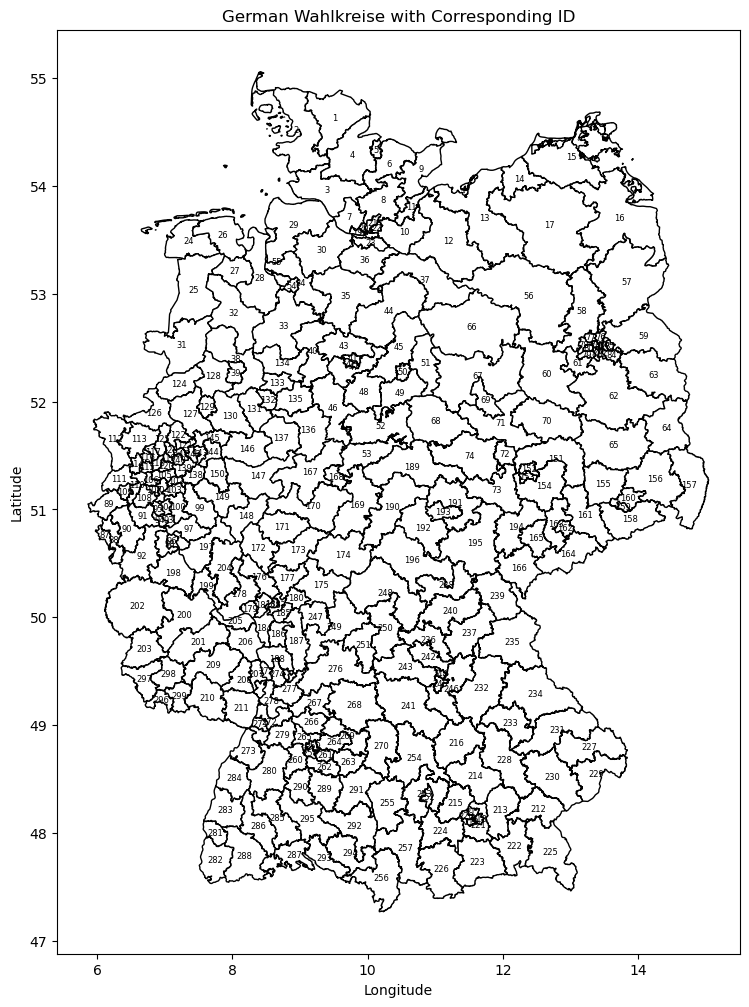

In [12]:
#First up: A shapefile containing geographic information for all 299 Wahlkreise in Germany as well as unique identifiers for each of them

shapefile_path = "Data sources/btw21_geometrie_wahlkreise_vg250_geo_shp/Geometrie_Wahlkreise_20DBT_VG250_geo.shp"
wahlkreise_germany = gpd.read_file(shapefile_path)

# Plot the shapefile on a map
fig, ax = plt.subplots(figsize=(12, 12))
wahlkreise_germany.plot(ax=ax, color='white', edgecolor='black')

# Add labels for each electoral district
for x, y, label in zip(wahlkreise_germany.geometry.centroid.x, wahlkreise_germany.geometry.centroid.y, wahlkreise_germany['WKR_NR']):
    ax.text(x, y, str(label), fontsize=6, ha='center', va='center', color='black')

# Customize the plot as needed
ax.set_title("German Wahlkreise with Corresponding ID")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

## LOR-Räume in Berlin (probably not needed since RBS are the correct level)

The next chunk plots an overview of important geographic levels within Berlin.

* Bezirke are the city districts. There are 12 districts in total, and they are roughly equal to the voting districts in Berlin (although there are minor differences, some streets/blocks from one city district belong to another voting district).
* The next tree levels are sublevels, all belonging to the "Lebensweltlich organisierte Räume", trying to divide the city into societally homogenous entities: 
    * Prognoseräume are the largest level, separating the city in 58 districts with (on average) 60,000 residents
    * Bezirksregionen are the middle level, separating the city in 143 districts with (on average) 25,000 residents
    *  Planungsräume are the most granular level, separating the city in 542 districts with (on average) 7,500 residents

In the code chunk below, these four levels of geogrpahic representation are plotted. 

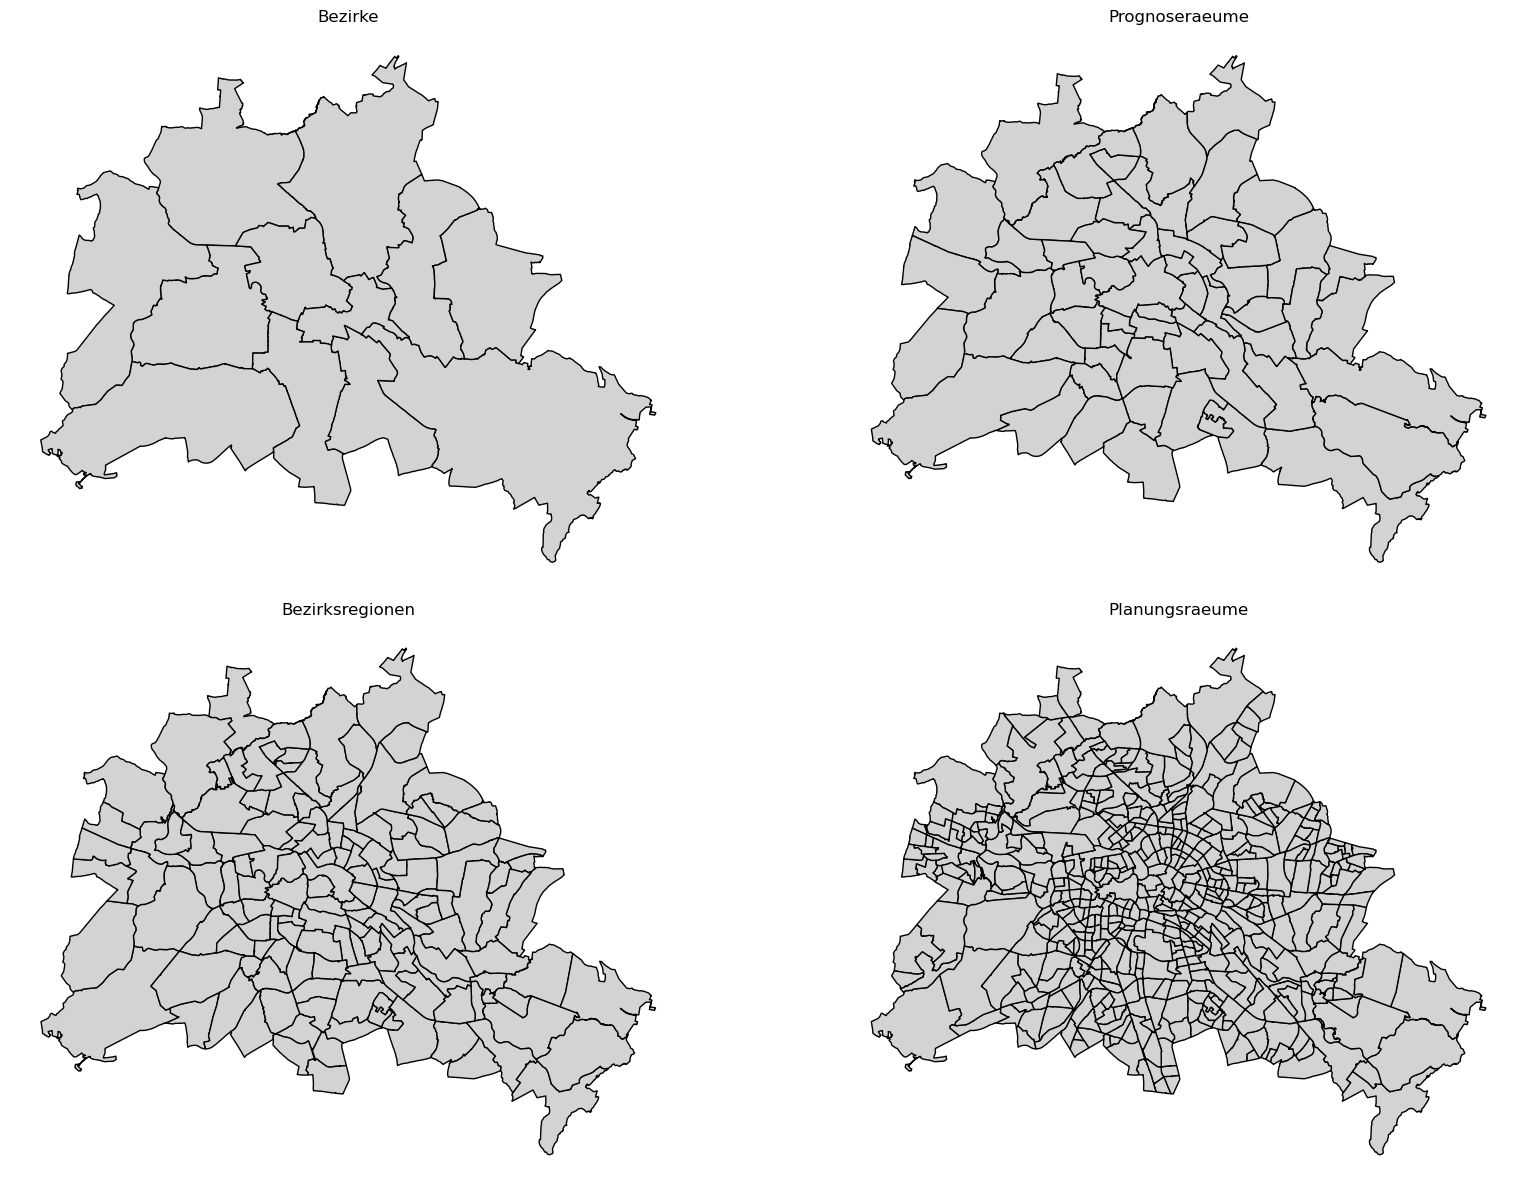

In [16]:
bezirke_path = "Data sources/bezirke/bezirksgrenzen.shp"
prognoseraeume_path = "Data sources/Berlin LOR-Räume/LOR_Räume_2021/lor_prognoseraeume_2021.shp/lor_prognoseraeume_2021.shp"
bezirksregionen_path = "Data sources/Berlin LOR-Räume/LOR_Räume_2021/lor_bezirksregionen_2021.shp/lor_bezirksregionen_2021.shp"
planungsraeume_path = "Data sources/Berlin LOR-Räume/LOR_Räume_2021/lor_planungsraeume_2021.shp/lor_planungsraeume_2021.shp"

bezirke = gpd.read_file(bezirke_path)
prognoseraeume = gpd.read_file(prognoseraeume_path)
bezirksregionen = gpd.read_file(bezirksregionen_path)
planungsraeume = gpd.read_file(planungsraeume_path)

fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'width_ratios': [2, 2], 'height_ratios': [2, 2]})

# Plot Bezirke
bezirke.plot(ax=axes[0, 0], color='lightgray', edgecolor='black')
axes[0, 0].set_title('Bezirke')
axes[0, 0].set_axis_off() 

# Plot Prognoseraeume
prognoseraeume.plot(ax=axes[0, 1], color='lightgray', edgecolor='black')
axes[0, 1].set_title('Prognoseraeume')
axes[0, 1].set_axis_off() 

# Plot Bezirksregionen
bezirksregionen.plot(ax=axes[1, 0], color='lightgray', edgecolor='black')
axes[1, 0].set_title('Bezirksregionen')
axes[1, 0].set_axis_off() 

# Plot Planungsraeume
planungsraeume.plot(ax=axes[1, 1], color='lightgray', edgecolor='black')
axes[1, 1].set_title('Planungsraeume')
axes[1, 1].set_axis_off() 


plt.tight_layout()
plt.show()


## RBS-Blockflächen

There is, however, another granular level that divides Berlin geographically: The RBS-Blöcke. RBS-Blöcke are the most narrow level to divide the city. One block usually resembles an are that is surrounded by streets. This level is also used by the city for reshaping voting districts. The data is available in the WFS format here: https://gdi.berlin.de/geonetwork/srv/ger/catalog.search#/metadata/ccfcd96d-31dd-3b23-b8a0-dc476a4c4f92. RBS-Blöcke are updated every 6 months. The current data is of November 2023. 

Before reading the data in (chunk below), I accessed the WFS file using QGIS and exported it as shp. 

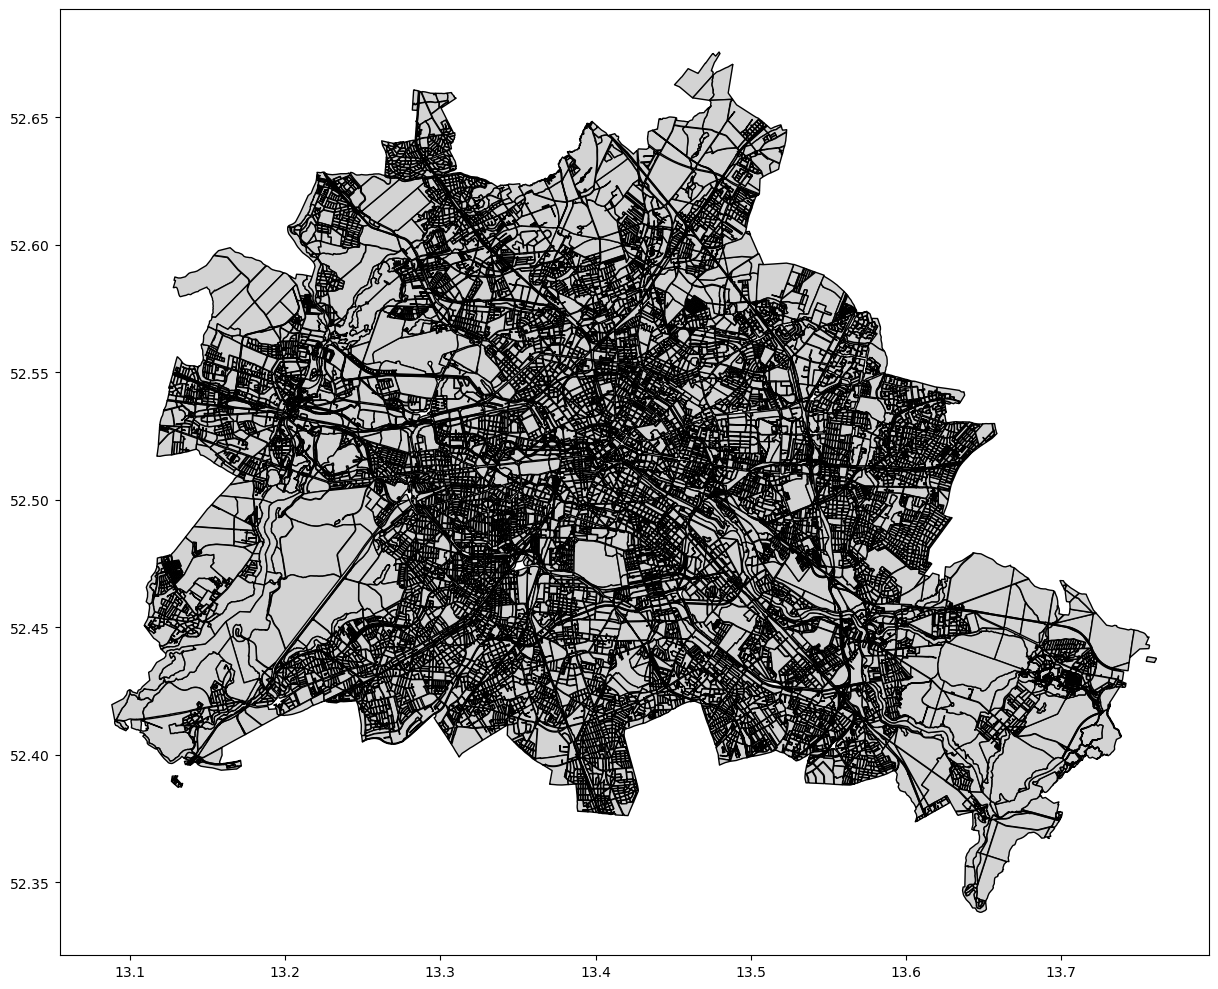

In [17]:
# Plotting Blockflächen

bloecke_path = "Data sources/rbs_bloecke_wfs/rbs_bloecke_wfs.shp"
bloecke = gpd.read_file(bloecke_path)

# Set a larger figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Plot Blockflächen
bloecke.plot(color='lightgray', edgecolor='black', ax=ax)

# Show the plot
plt.tight_layout()
plt.show()

## Meta data: Calculating the proportion of foreigners in each city district (Bezirk)

In [43]:
# In this chunk, I am importing two data sets: ewr_total contains inormation on the number of residents for all levels down to the Planungsräume. ewr_foreigners contains the number of foreigners for the same geographic entities. 

ewr_total = pd.read_csv("Data sources/Berlin LOR-Räume/ewr_total.csv", sep=";")
ewr_foreigners = pd.read_csv("Data sources/Berlin LOR-Räume/ewr_auslaender.csv", sep=";")

ewr_foreigners.head()
ewr_total.head()

ZEIT   RAUMID  BEZ  PGR  BZR  PLR  STADTRAUM   E_E  E_EM  E_EW  ...  \
0  202012  1011101    1    1   11    1          1  3419  1796  1623  ...   
1  202012  1011102    1    1   11    2          1   192   121    71  ...   
2  202012  1011103    1    1   11    3          1  5211  2783  2428  ...   
3  202012  1011104    1    1   11    4          1  4636  2563  2073  ...   
4  202012  1011105    1    1   11    5          1  1599   882   717  ...   

   E_E95_110  E_EU1  E_E1U6  E_E6U15  E_E15U18  E_E18U25  E_E25U55  E_E55U65  \
0          6     22     134      143        28       256      1708       377   
1          0      0       6        6         4        13        99        36   
2         24     39     225      306       102       417      2403       740   
3          3     40     216      410       112       528      2464       500   
4          0     16      76       88        43        92       883       204   

   E_E65U80  E_E80U110  
0       535        216  
1        19          9  
2       716        263  
3       303         63  
4       148         49  

[5 rows x 51 columns]

In [44]:
# Next, based on the unique identifier "RAUMID", I am merging the total resident numbers with the number of foreigners. This will enable me to calculate the proportion of foreigners on each geographical level. 

# Set 'RAUMID' as the index for both DataFrames
ewr_total = ewr_total.set_index('RAUMID')
ewr_foreigners = ewr_foreigners.set_index('RAUMID')

# Combine the DataFrames using combine_first
merged_ewr = ewr_total.combine_first(ewr_foreigners)

# Reset 'RAUMID' as a regular column
merged_ewr = merged_ewr.reset_index()

# Display the merged dataset
print(merged_ewr.head())

    RAUMID  BEZ  BZR   E_A  E_A00_01  E_A01_02  E_A02_03  E_A03_05  E_A05_06  \
0  1011101    1   11  1387         3         3         9        14         9   
1  1011102    1   11    73         0         0         3         0         0   
2  1011103    1   11  1853         0        16         9        19         6   
3  1011104    1   11  1787        10         9         6        19        12   
4  1011105    1   11   836        10         6         3        15         8   

   E_A06_07  ...  E_E85_90  E_E90_95  E_E95_110  E_EM  E_EU1  E_EW  PGR  PLR  \
0         3  ...        51        18          6  1796     22  1623    1    1   
1         0  ...         0         0          0   121      0    71    1    2   
2         3  ...        63        30         24  2783     39  2428    1    3   
3        14  ...        18        12          3  2563     40  2073    1    4   
4         9  ...        12         6          0   882     16   717    1    5   

   STADTRAUM    ZEIT  
0          1  2

In [45]:
# Calculate foreigners proportion in each row
merged_ewr["foreigners_proportion"] = merged_ewr["E_A"] / merged_ewr["E_E"]

In [25]:
# Here, I am calculating the proportion of foreigners in each Bezirk (city district). The column E_E includes the total number of residents, the column E_A includes the total number of foreign residents.

# Calculate the total foreigners and total population for each 'BEZ'
grouped_ewr = merged_ewr.groupby('BEZ').agg({'E_A': 'sum', 'E_E': 'sum'})

# Calculate the proportion of foreigners for each 'BEZ'
grouped_ewr['foreigners_proportion'] = grouped_ewr['E_A'] / grouped_ewr['E_E']

# Display the result
print(grouped_ewr[['foreigners_proportion']])

     foreigners_proportion
BEZ                       
1                 0.341327
2                 0.280768
3                 0.148889
4                 0.254490
5                 0.211769
6                 0.154582
7                 0.206203
8                 0.261032
9                 0.109449
10                0.125850
11                0.185998
12                0.193625


In [28]:
# Adding the foreigners proportion to the shapefile of city districts, using Gemeinde_s and BEZ as merging keys (both resemble the district number)

# Convert 'Gemeinde_s' column to int64 in bezirke
bezirke['Gemeinde_s'] = bezirke['Gemeinde_s'].astype(int)

# Merge bezirke with grouped_ewr
merged_data = pd.merge(bezirke, grouped_ewr, left_on='Gemeinde_s', right_on='BEZ', how='left')

# Print the merged data
print(merged_data)

                         gml_id                  Gemeinde_n  Gemeinde_s  \
0    s_wfs_alkis_bezirk.F176__1               Reinickendorf          12   
1    s_wfs_alkis_bezirk.F176__2  Charlottenburg-Wilmersdorf           4   
2    s_wfs_alkis_bezirk.F176__3            Treptow-Köpenick           9   
3    s_wfs_alkis_bezirk.F176__4                      Pankow           3   
4    s_wfs_alkis_bezirk.F176__5                    Neukölln           8   
5    s_wfs_alkis_bezirk.F176__6                 Lichtenberg          11   
6    s_wfs_alkis_bezirk.F176__7         Marzahn-Hellersdorf          10   
7    s_wfs_alkis_bezirk.F176__8                     Spandau           5   
8    s_wfs_alkis_bezirk.F176__9         Steglitz-Zehlendorf           6   
9   s_wfs_alkis_bezirk.F176__10                       Mitte           1   
10  s_wfs_alkis_bezirk.F176__11    Friedrichshain-Kreuzberg           2   
11  s_wfs_alkis_bezirk.F176__12        Tempelhof-Schöneberg           7   

   Land_name Land_schlu 

In [29]:
# We can now plot an interactive map of the city districts and color them according to the proportion of foreigner in each Bezirk. 


# Create an interactive map with Plotly Express
fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color='foreigners_proportion',
    color_continuous_scale='reds',  # Change the color scale
    hover_name='Gemeinde_n',  # Display Gemeinde name on hover
    hover_data={'foreigners_proportion': ':.2f'},
    mapbox_style="carto-positron",
    center={"lat": 52.5200, "lon": 13.4050},  # Centered on Berlin
    zoom=9,
    opacity=0.7,
    range_color=[0, max(merged_data['foreigners_proportion'])],
)

# Update layout for better readability
fig.update_layout(
    title_text='Bezirke Map with Foreigners Proportion',
    margin=dict(l=0, r=0, b=0, t=50),
    coloraxis_colorbar=dict(title='Foreigners Proportion'),
)

# Display the interactive map
fig.show()



/var/folders/yz/j2f_2fj52f1dq645xw5z31lm0000gn/T/ipykernel_7185/2752747597.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




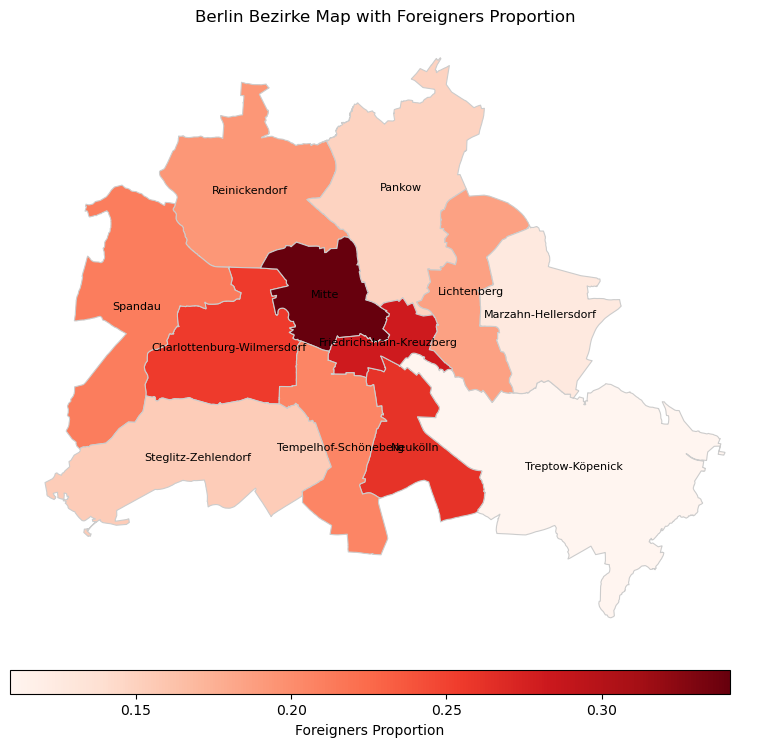

In [30]:
# Plot the map without axes, labels, and box
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()

# Plot Bezirke with colored polygons
plot = merged_data.plot(column='foreigners_proportion', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Label Gemeinde names
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Gemeinde_n']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Set title
ax.set_title('Berlin Bezirke Map with Foreigners Proportion', fontsize=12)

# Create colorbar
cax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  # Adjust these values to position the colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=merged_data['foreigners_proportion'].min(), vmax=merged_data['foreigners_proportion'].max()))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', label='Foreigners Proportion')

# Display the map
plt.show()


## Visualizing proportions in PLR

In [47]:
merged_ewr.columns

Index(['RAUMID', 'BEZ', 'BZR', 'E_A', 'E_A00_01', 'E_A01_02', 'E_A02_03',
       'E_A03_05', 'E_A05_06', 'E_A06_07', 'E_A07_08', 'E_A08_10', 'E_A10_12',
       'E_A12_14', 'E_A14_15', 'E_A15U18', 'E_A15_18', 'E_A18U25', 'E_A18_21',
       'E_A1U6', 'E_A21_25', 'E_A25U55', 'E_A25_27', 'E_A27_30', 'E_A30_35',
       'E_A35_40', 'E_A40_45', 'E_A45_50', 'E_A50_55', 'E_A55U65', 'E_A55_60',
       'E_A60_63', 'E_A63_65', 'E_A65U80', 'E_A65_67', 'E_A67_70', 'E_A6U15',
       'E_A70_75', 'E_A75_80', 'E_A80U110', 'E_A80_85', 'E_A85_90', 'E_A90_95',
       'E_A95_110', 'E_AM', 'E_AU1', 'E_AW', 'E_E', 'E_E00_01', 'E_E01_02',
       'E_E02_03', 'E_E03_05', 'E_E05_06', 'E_E06_07', 'E_E07_08', 'E_E08_10',
       'E_E10_12', 'E_E12_14', 'E_E14_15', 'E_E15U18', 'E_E15_18', 'E_E18U25',
       'E_E18_21', 'E_E1U6', 'E_E21_25', 'E_E25U55', 'E_E25_27', 'E_E27_30',
       'E_E30_35', 'E_E35_40', 'E_E40_45', 'E_E45_50', 'E_E50_55', 'E_E55U65',
       'E_E55_60', 'E_E60_63', 'E_E63_65', 'E_E65U80', 'E_E65_67

In [51]:
# Convert the 'broker Dow' column in planungsraeume to the same data type as 'RAUMID' in merged_ewr
planungsraeume['PLR_ID'] = planungsraeume['PLR_ID'].astype(int)

# Assuming merged_ewr and planungsraeume are your DataFrames
planungsraeume = pd.merge(planungsraeume, merged_ewr[['RAUMID', 'foreigners_proportion']], left_on='PLR_ID', right_on='RAUMID', how='left')

# Drop the redundant RAUMID column
planungsraeume = planungsraeume.drop(columns='RAUMID')

KeyError: 'foreigners_proportion'

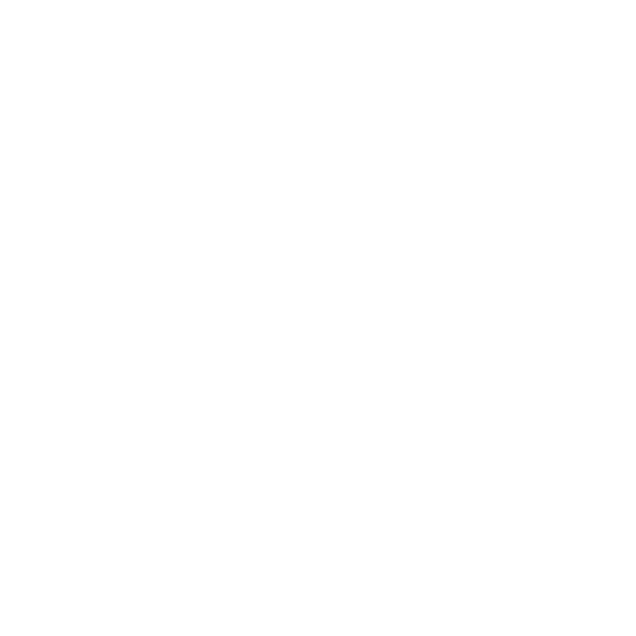

In [52]:
# Plot the map without axes, labels, and box
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()

# Plot Bezirke with colored polygons
plot = planungsraeume.plot(column='foreigners_proportion', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)


# Set title
ax.set_title('Berlin Bezirke Map with Foreigners Proportion', fontsize=12)

# Create colorbar
cax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  # Adjust these values to position the colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=planungsraeume['foreigners_proportion'].min(), vmax=merged_data['foreigners_proportion'].max()))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', label='Foreigners Proportion')

# Display the map
plt.show()

# RBS Blöcke mit Metainformationen der Wahlkreise

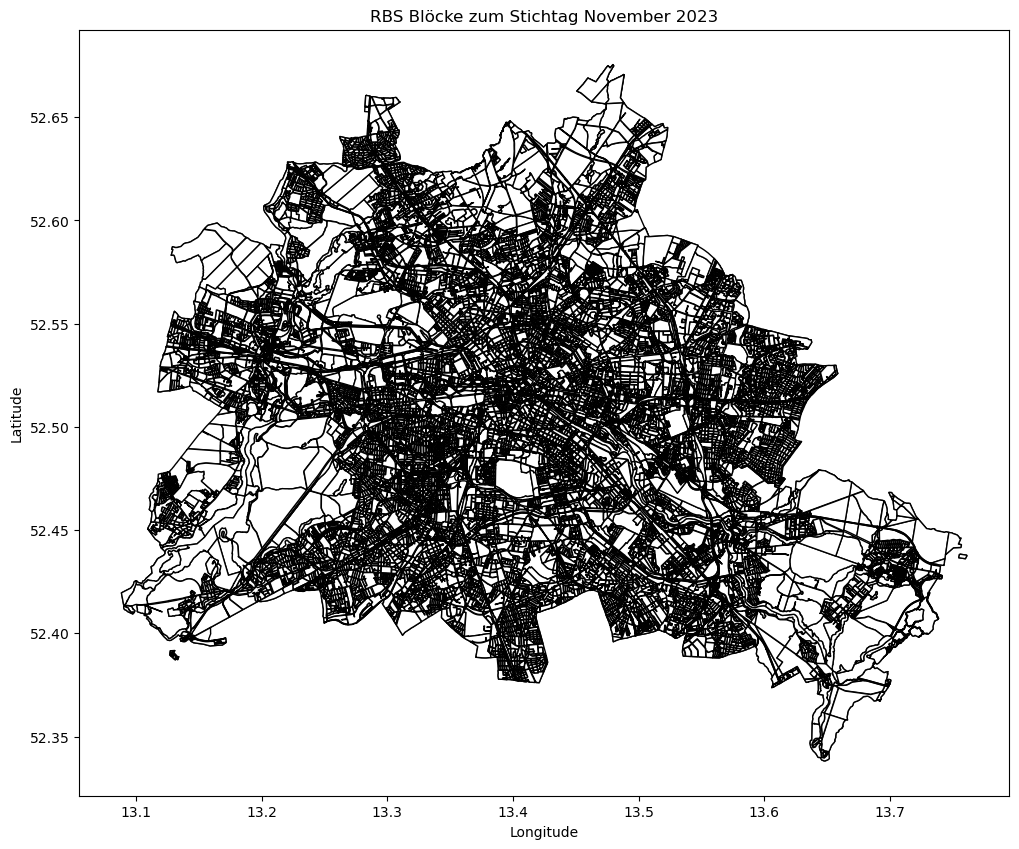

Index(['blknr', 'bez', 'bezname', 'plr', 'blktypname', 'ewk', 'area', 'datum',
       'WKR_NR', 'WKR_NAME', 'LAND_NR', 'LAND_NAME', 'geometry'],
      dtype='object')

In [58]:
shapefile_path = "/Users/carlogress/Documents/GitHub/ma_thesis/Data sources/merged_wks_rbs/merged.shp"
wks = gpd.read_file(shapefile_path)

# Plot the shapefile on a map
fig, ax = plt.subplots(figsize=(12, 12))
wks.plot(ax=ax, color='white', edgecolor='black')

# Customize the plot as needed
ax.set_title("RBS Blöcke zum Stichtag November 2023")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()
wks.columns



In [59]:
selected_rows = wks[wks['blknr'] == '040007']

# Print the selected row(s)
print(selected_rows)

wks.to_csv("Data sources/wks.csv", index = False)

       blknr bez                     bezname       plr blktypname  \
8167  040007  04  Charlottenburg-Wilmersdorf  04500937      Block   

                           ewk          area       datum  WKR_NR  \
8167  mehr als 1.000 Einwohner  45065.199219  1995-02-07      80   

                               WKR_NAME LAND_NR LAND_NAME  \
8167  Berlin-Charlottenburg-Wilmersdorf      11    Berlin   

                                               geometry  
8167  POLYGON ((13.29452 52.49795, 13.29431 52.49805...  


In [55]:
wahlkreise_germany.head(10)

WKR_NR                            WKR_NAME LAND_NR           LAND_NAME  \
0       1               Flensburg – Schleswig      01  Schleswig-Holstein   
1       2   Nordfriesland – Dithmarschen Nord      01  Schleswig-Holstein   
2       3        Steinburg – Dithmarschen Süd      01  Schleswig-Holstein   
3       4               Rendsburg-Eckernförde      01  Schleswig-Holstein   
4       5                                Kiel      01  Schleswig-Holstein   
5       6                   Plön – Neumünster      01  Schleswig-Holstein   
6       7                           Pinneberg      01  Schleswig-Holstein   
7       8           Segeberg – Stormarn-Mitte      01  Schleswig-Holstein   
8       9         Ostholstein – Stormarn-Nord      01  Schleswig-Holstein   
9      10  Herzogtum Lauenburg – Stormarn-Süd      01  Schleswig-Holstein   

                                            geometry  
0  POLYGON ((9.70877 54.83053, 9.73293 54.82493, ...  
1  MULTIPOLYGON (((8.73594 54.46762, 8.73496 54.4...  
2  MULTIPOLYGON (((8.69258 54.06045, 8.69364 54.0...  
3  POLYGON ((9.97162 54.64695, 9.97222 54.64665, ...  
4  POLYGON ((10.17204 54.43246, 10.17346 54.43039...  
5  MULTIPOLYGON (((10.12669 53.95311, 10.12493 53...  
6  MULTIPOLYGON (((9.75145 53.89304, 9.76114 53.8...  
7  MULTIPOLYGON (((10.10121 53.97246, 10.09906 53...  
8  MULTIPOLYGON (((11.11044 54.39305, 11.11193 54...  
9  MULTIPOLYGON (((10.23275 53.70504, 10.23442 53...

In [60]:

import folium
# Filter the GeoDataFrame for blknr 001001
selected_area = wks[wks['blknr'] == '170004']

# Create an interactive map using folium
m = folium.Map(location=[selected_area.geometry.centroid.y.mean(), selected_area.geometry.centroid.x.mean()], zoom_start=12)

# Add the GeoDataFrame to the map
folium.GeoJson(selected_area).add_to(m)

m

/var/folders/yz/j2f_2fj52f1dq645xw5z31lm0000gn/T/ipykernel_7185/2446197851.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




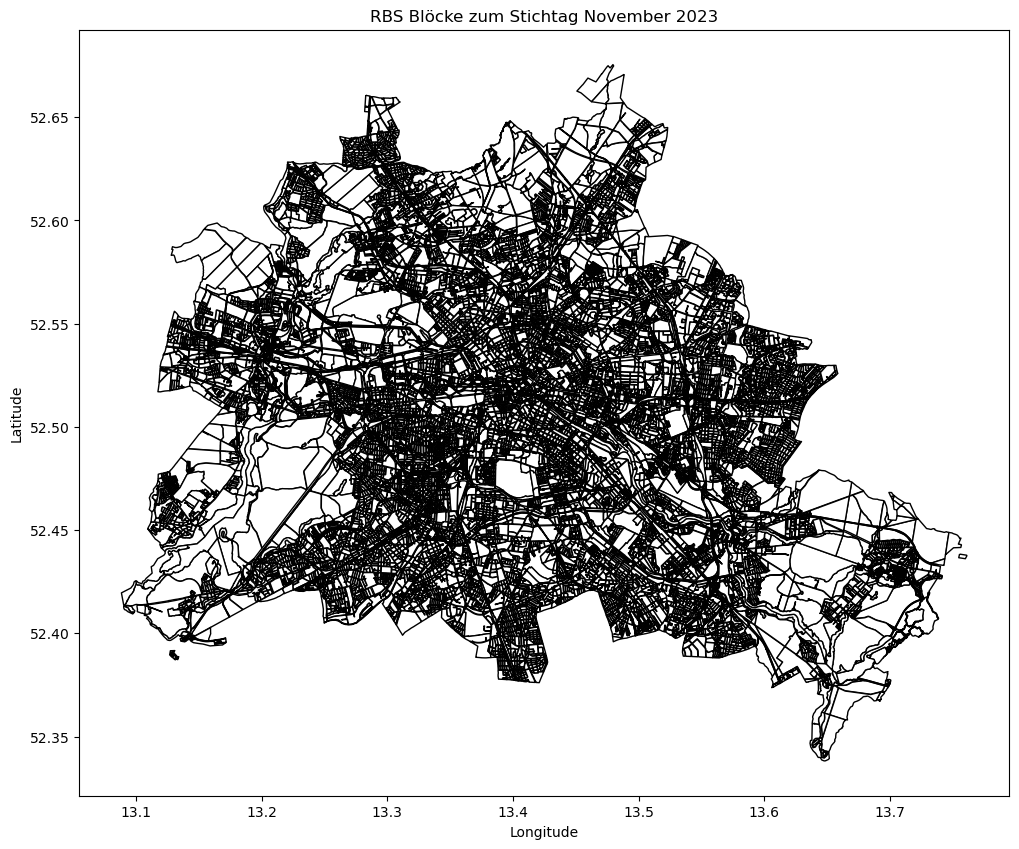

In [63]:
shapefile_path = "/Users/carlogress/Desktop/join.shp"
join = gpd.read_file(shapefile_path)

# Plot the shapefile on a map
fig, ax = plt.subplots(figsize=(12, 12))
join.plot(ax=ax, color='white', edgecolor='black')

# Customize the plot as needed
ax.set_title("RBS Blöcke zum Stichtag November 2023")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()
join.to_csv("join.csv", index = False)

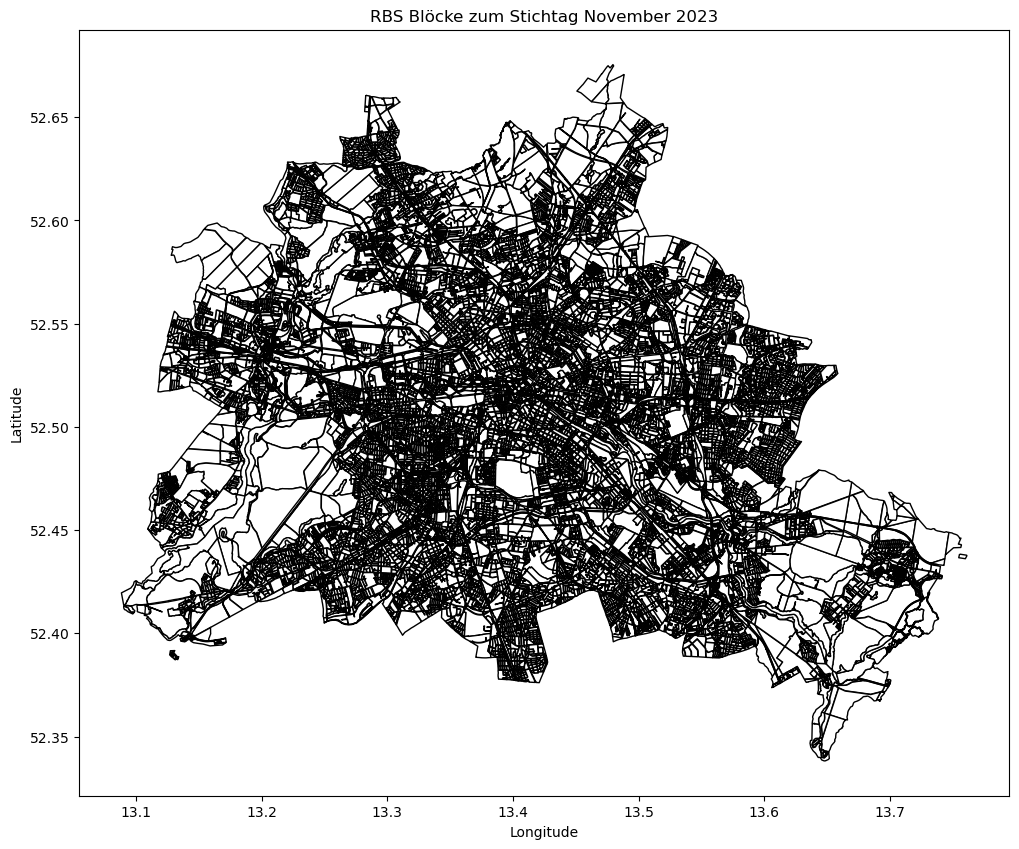

In [64]:
shapefile_path = "/Users/carlogress/Desktop/joined2.shp"
joined2 = gpd.read_file(shapefile_path)

# Plot the shapefile on a map
fig, ax = plt.subplots(figsize=(12, 12))
joined2.plot(ax=ax, color='white', edgecolor='black')

# Customize the plot as needed
ax.set_title("RBS Blöcke zum Stichtag November 2023")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()
joined2.to_csv("joined2.csv", index = False)